In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

Beobachtung: Anzahl der Kopfwürfe
$$
    h(0) = 4 , \qquad
    h(1) = 9 , \qquad
    h(2) = 2 .
$$

Sei 
\begin{align*}
    p^1(K) &= a & p^2(K) &= b \\
    p^1(Z) &= 1-a & p^2(Z) &= 1-b 
\end{align*}

Die Likelihood des $Y$-Korpus $h$ ist dann gegeben durch
\begin{align*}
    L(h, p) &= \big( p^1(Z) * p^2(Z) \big)^{h(0)} * \big( p^1(K) * p^2(Z) + p^1(Z) * p^2(K) \big)^{h(1)} * \big( p^1(K) * p^2(K) \big)^{h(2)} \\
    &= \big( (1-a) * (1-b) \big)^{4} * \big( a * (1-b) + (1-a) * b \big)^{9} * \big( ab \big)^{2}
\end{align*}

In [2]:
likelihood = lambda a, b: ((1-a) * (1-b))**4 * (a * (1-b) + (1-a) * b)**9 * (a * b)**2

In [3]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X, Y = np.meshgrid(x, y)
Z = likelihood(X, Y)

<IPython.core.display.Javascript object>


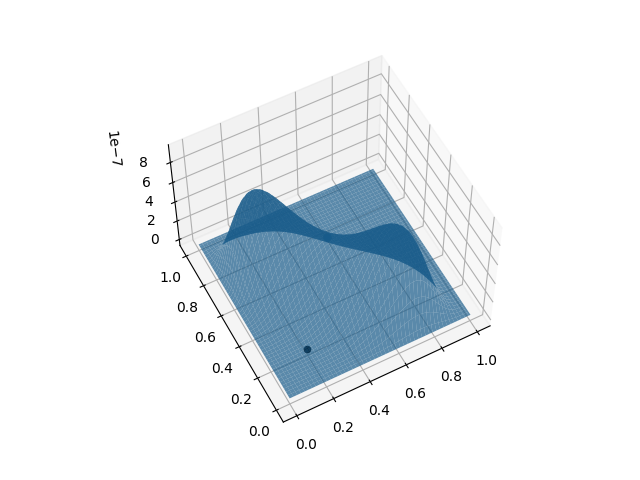

In [15]:
fig = plt.figure()
# ax = plt.axes()
# ax.contourf(X, Y, Z)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
plt.show()

In [5]:
ERG = {'K', 'Z'}

def beobachte(ergebnis): 
        return np.count_nonzero(np.array(ergebnis) == 'K')

def analysator(beobachtung):
    if (beobachtung == 0):
        return [('Z', 'Z')]
    elif (beobachtung == 1):
        return [('Z', 'K'), ('K', 'Z')]
    elif (beobachtung == 2):
        return [('K', 'K')]
    else:
        return None

def e_schritt(ergebnismenge, p, korpus_X, korpus_Y):
    for ergebnis in ergebnismenge:
        anteil = p[ergebnis] / sum([p[result] for result in analysator(beobachte(ergebnis))])
        korpus_X[ergebnis] = korpus_Y[beobachte(ergebnis)] * anteil
    return korpus_X

def unabhaengiges_product(p1, p2, ergebnismenge):
    p = dict.fromkeys(ergebnismenge, None)
    for (i,j) in ergebnismenge:
        p[(i,j)] = p1[i] * p2[j]
    return p

def marginalisierung(h, ergebnismenge):
    h1, h2 = dict.fromkeys(ERG, 0), dict.fromkeys(ERG, 0)
    
    for (i,j) in ergebnismenge:
        h1[i] = sum([h[(i,k)] for k in ERG])
        h2[j] = sum([h[(k,j)] for k in ERG])

    return h1, h2

def rfe_marginal(h1, h2):
    p1, p2 = dict.fromkeys(ERG, 0), dict.fromkeys(ERG, 0)
    gesamt = sum(h1.values())
    
    for erg in ERG:
        p1[erg] = h1[erg] / gesamt
        p2[erg] = h2[erg] / gesamt

    return p1, p2

In [16]:
ergebnismenge = [('Z', 'Z'), ('Z', 'K'), ('K', 'Z'), ('K', 'K')]

a = 0.2
b = 0.2
ax.scatter(a, b, likelihood(a, b), c='0')

p1 = {'K': a, 'Z': 1-a}
p2 = {'K': b, 'Z': 1-b}

korpus_X = dict.fromkeys(ergebnismenge, 0)
korpus_Y = { 0:4, 1:9, 2:2 }

for i in range(21):
    #print("\nITERATION : ", i)
    print(f"(a_{i}, b_{i}) = ({a}, {b})")

    p = unabhaengiges_product(p1, p2, ergebnismenge)
    
    korpus_X = e_schritt(ergebnismenge, p, korpus_X, korpus_Y)
    #print('X-Korpus: ', korpus_X)
    
    korpus_X1, korpus_X2 = marginalisierung(korpus_X, ergebnismenge)
    #print('h1 = ', korpus_X1, '\nh2 = ', korpus_X2)
    
    p1, p2 = rfe_marginal(korpus_X1, korpus_X2)
    # print('p1 = ',p1, 'p2 = ', p2)
    a = p1['K']
    b = p2['K']

    # ax.scatter(a, b, c='0')
    ax.scatter(a, b, likelihood(a, b))

    

(a_0, b_0) = (0.2, 0.2)
(a_1, b_1) = (0.43333333333333335, 0.43333333333333335)
(a_2, b_2) = (0.43333333333333335, 0.43333333333333335)
(a_3, b_3) = (0.43333333333333335, 0.43333333333333335)
(a_4, b_4) = (0.43333333333333335, 0.43333333333333335)
(a_5, b_5) = (0.43333333333333335, 0.43333333333333335)
(a_6, b_6) = (0.43333333333333335, 0.43333333333333335)
(a_7, b_7) = (0.43333333333333335, 0.43333333333333335)
(a_8, b_8) = (0.43333333333333335, 0.43333333333333335)
(a_9, b_9) = (0.43333333333333335, 0.43333333333333335)
(a_10, b_10) = (0.43333333333333335, 0.43333333333333335)
(a_11, b_11) = (0.43333333333333335, 0.43333333333333335)
(a_12, b_12) = (0.43333333333333335, 0.43333333333333335)
(a_13, b_13) = (0.43333333333333335, 0.43333333333333335)
(a_14, b_14) = (0.43333333333333335, 0.43333333333333335)
(a_15, b_15) = (0.43333333333333335, 0.43333333333333335)
(a_16, b_16) = (0.43333333333333335, 0.43333333333333335)
(a_17, b_17) = (0.43333333333333335, 0.43333333333333335)
(a_18, b

<IPython.core.display.Javascript object>


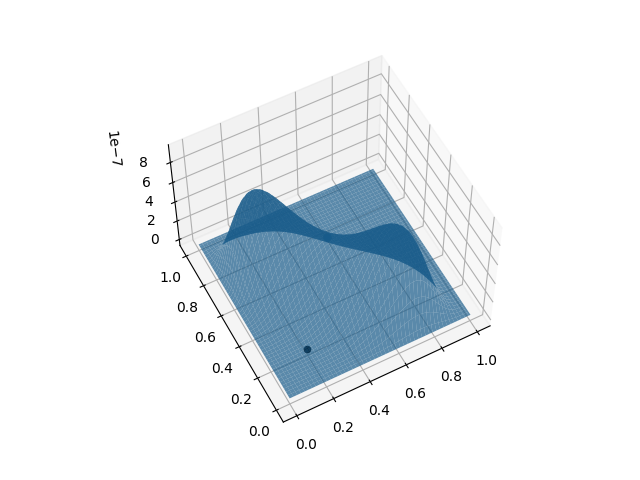

In [17]:
fig